**bold text**## Gradio Fish


In [ ]:
!pip install -Uqq fastai
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00


In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from pathlib import Path
fish_types = 'calico bass','vermillion rockfish','lingcod'
path = Path('fish')

In [ ]:
if not path.exists():
    path.mkdir()
for o in fish_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
len(fns)

513

In [ ]:
failed = verify_images(fns)
failed

(#4) [Path('fish/lingcod/02702d7f-c733-49b1-846f-7ead95fa4e15.jpg'),Path('fish/calico bass/b3150528-ac19-430e-9979-f7feb54f47f1.jpg'),Path('fish/calico bass/9d0de116-c28b-481b-8514-700a2ad5721d.jpg'),Path('fish/calico bass/f5aa5386-574a-438a-a9d8-b1b15bff1414.jpg')]

In [ ]:
failed.map(Path.unlink)

(#4) [None,None,None,None]

In [ ]:
fish = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [ ]:
fish = fish.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [ ]:
dls = fish.dataloaders(path)

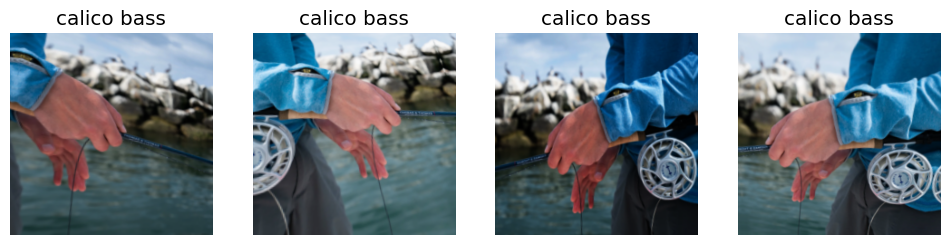

In [ ]:
dls.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.737868,1.055797,0.346535,00:20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.843170,0.610479,0.237624,00:09
1,0.681230,0.379248,0.168317,00:11
2,0.551433,0.284692,0.108911,00:12
3,0.461667,0.275666,0.108911,00:11


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
learn.export('model.pkl')

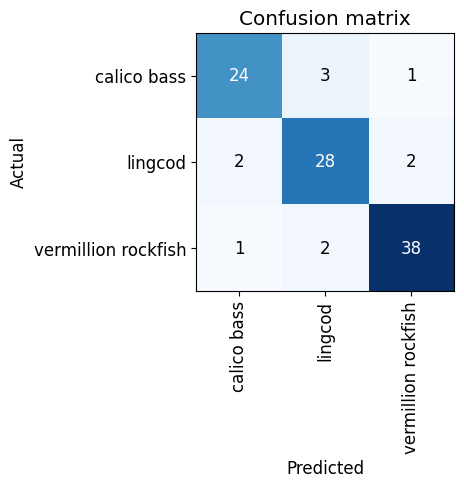

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
learn = load_learner('model.pkl')

In [ ]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
!pip install gradio -Uqq

In [ ]:
import gradio as gr
gr.Interface(
    fn=predict,
    inputs=gr.Image(height=512, width=512),
    outputs=gr.Label(num_top_classes=3)
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://083061f92193426662.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
